In [2]:
##Linear regression project pytorch - Practical 

import torch 
import torch.nn as nn
import numpy as np 
import matplotlib.pyplot as plt 

In [3]:
## here there is 1D linear regression y = wx+b 
x = torch.tensor(range(-5,5),dtype=torch.float32)
print(x)

tensor([-5., -4., -3., -2., -1.,  0.,  1.,  2.,  3.,  4.])


In [4]:
w_gt =3 
b_gt = 4 
y = w_gt*x +b_gt
y

tensor([-11.,  -8.,  -5.,  -2.,   1.,   4.,   7.,  10.,  13.,  16.])

In [5]:
##random initial value 
w = torch.randn(1, requires_grad=True)
b = torch.randn(1, requires_grad=True)
print(f"w:{w}")
print(f"b:({b}")
learning_rate = 0.01

w:tensor([0.9546], requires_grad=True)
b:(tensor([-0.6465], requires_grad=True)


In [6]:
def trainmodel(w, b, lr, iternum):
    for i in range(iternum):
        y_prediction = w*x + b

        loss = ((y_prediction - y)**2).mean()
        loss.backward()   # Compute the Gradients for w and b (requires_grad=True)
        print(w,w.grad)
        # Update parameters
        with torch.no_grad():   # Temporarily set all requires_grad=False
            w -= lr * w.grad
            b -= lr * b.grad
            # Remember to zero the gradients!
            # If not, the gradients will be accumulated
            w.grad.zero_()
            b.grad.zero_()
        print("Error: {:.4f}".format(loss))

In [7]:
trainmodel(w,b,learning_rate,10)

tensor([0.9546], requires_grad=True) tensor([-30.1246])
Error: 47.6462
tensor([1.2559], requires_grad=True) tensor([-25.0759])
Error: 38.8008
tensor([1.5066], requires_grad=True) tensor([-20.8870])
Error: 32.4860
tensor([1.7155], requires_grad=True) tensor([-17.4113])
Error: 27.9206
tensor([1.8896], requires_grad=True) tensor([-14.5270])
Error: 24.5670
tensor([2.0349], requires_grad=True) tensor([-12.1333])
Error: 22.0549
tensor([2.1562], requires_grad=True) tensor([-10.1465])
Error: 20.1296
tensor([2.2577], requires_grad=True) tensor([-8.4971])
Error: 18.6154
tensor([2.3427], requires_grad=True) tensor([-7.1276])
Error: 17.3913
tensor([2.4139], requires_grad=True) tensor([-5.9903])
Error: 16.3736


In [8]:
y_pred = (w*x + b)
y_pred = y_pred.data.numpy()
print("----- ----- ----- ----- -----")
print("Prediction:")
print("w_pred = {:.2f}, b_pred = {:.2f}".format(w[0] ,b[0]))
print("Ground-truth:")
print("w_gt = {:.2f}, b_gt = {:.2f}".format(w_gt ,b_gt))

----- ----- ----- ----- -----
Prediction:
w_pred = 2.47, b_pred = 0.10
Ground-truth:
w_gt = 3.00, b_gt = 4.00


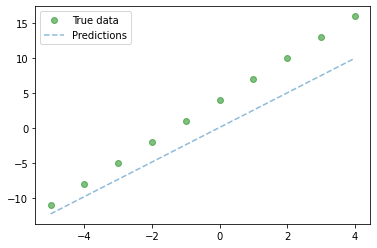

In [9]:
plt.clf()
plt.plot(x, y, 'go', label='True data', alpha=0.5)
plt.plot(x, y_pred, '--', label='Predictions', alpha=0.5)
plt.legend(loc='best')
plt.show()

In [24]:
##Linear regression using torch nn.module 
import torch.nn as nn 

class Linearregression(torch.nn.Module):
    def __init__(self):
        super(LinearRegression, self).__init__() 
        self.linear = torch.nn.Linear(1, 1, bias = True) # bias is default True

    def forward(self,x):
        y_pred = self.linear(x)
        return y_pred

In [ ]:
class LinearRegression(torch.nn.Module): 
    def __init__(self):
        super(LinearRegression, self).__init__() 
        self.linear = torch.nn.Linear(1, 1, bias = True) # bias is default True

    def forward(self, x):
        y_pred = self.linear(x)
        return y_pred

In [25]:
our_model =LinearRegression()

In [26]:
##Construct the loss and optimizer'
learning_rate = 0.01 
loss = torch.nn.MSELoss()
optimizer = torch.optim.SGD(our_model.parameters(),lr=learning_rate)

In [62]:
x_train = x[:,None]
y_train = y[:,None]
print(y_train.shape)

torch.Size([10, 1])


In [75]:
##training the model 

def training_model(model,x,y,iter):

     

    for epochs in range(iter):
        ##forward 
        y_pred = our_model(x)

        ##loss
        ls = loss(y_pred,y)
        ls.backward()
        ## update paramaters
        optimizer.step()

        ### Clear gradient buffers  
        optimizer.zero_grad()

        if epochs % 10 ==0 :
            print(f"epochs :{epochs},loss ={ls.item()}")
 

In [76]:
training_model(our_model,x_train,y_train,100)

epochs :0,loss =3.1559920898871496e-08
epochs :10,loss =2.141312016590291e-08
epochs :20,loss =1.4453808816483615e-08
epochs :30,loss =9.750891649673576e-09
epochs :40,loss =6.6304037815712036e-09
epochs :50,loss =4.455159796634689e-09
epochs :60,loss =3.052406327697099e-09
epochs :70,loss =2.0435606540303297e-09
epochs :80,loss =1.4156285033095628e-09
epochs :90,loss =9.303903203417008e-10


In [77]:
y_pred_bi = our_model(x_train).data.numpy()

print("----- ----- ----- ----- -----")
print("Prediction:")
for name, param in our_model.named_parameters():
    if param.requires_grad:
        print(name, param.data)
print("Ground-truth:")
print("w_gt = {:.2f}, b_gt = {:.2f}".format(w_gt ,b_gt))

----- ----- ----- ----- -----
Prediction:
linear.weight tensor([[3.0000]])
linear.bias tensor([4.0000])
Ground-truth:
w_gt = 3.00, b_gt = 4.00


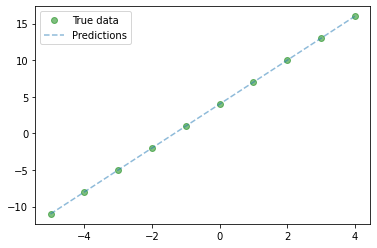

In [78]:
plt.clf()
plt.plot(x, y, 'go', label='True data', alpha=0.5)
plt.plot(x, y_pred_bi, '--', label='Predictions', alpha=0.5)
plt.legend(loc='best')
plt.show()